In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

# Padding
x_train=np.pad(x_train[:,], ((0,0),(2,2),(2,2)), 'constant')
x_test=np.pad(x_test[:,], ((0,0),(2,2),(2,2)), 'constant')
print('After Padding')
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)
After Padding
(60000, 32, 32)
(10000, 32, 32)


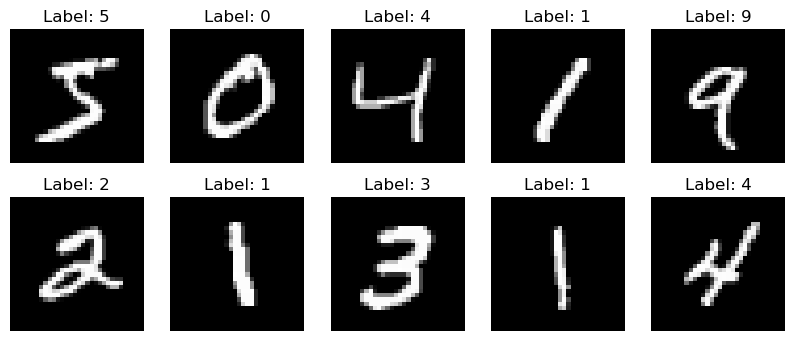

In [3]:
plt.figure(figsize=(10, 4))  # Set The size Of The Figure
for i in range(10):
    plt.subplot(2, 5, i + 1)  # Make subplots for 10 images
    plt.imshow(x_train[i], cmap='gray')  # Display The grayscale images
    plt.title(f"Label: {y_train[i]}")  # Add labels
    plt.axis('off')  # Axis Labels Turned Off
plt.show()  # Displaying the plot

In [4]:

x_train=x_train/255.0
x_test = x_test / 255.0

In [5]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))
print(x_train.shape)

(60000, 32, 32, 1)


In [6]:
#Create An Instance of Sequential Class.
LeNet5_Model=Sequential()
# Add First Convolutional Layer
LeNet5_Model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(32, 32, 1)))
# Add First Average Pooling Layer
LeNet5_Model.add(AveragePooling2D((2, 2)))
# Add Second Convolutional Layer
LeNet5_Model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
# Add Second Average Pooling Layer
LeNet5_Model.add(AveragePooling2D((2, 2)))
# Flatten The Layer
LeNet5_Model.add(Flatten())
# Flatten The Layer
#LeNet5_Model.add(Flatten())
# Add Dense Layer
LeNet5_Model.add(Dense(120, activation='tanh'))
LeNet5_Model.add(Dense(84, activation='tanh'))
LeNet5_Model.add(Dense(10, activation='softmax'))

C:\Users\itzme\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
LeNet5_Model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
LeNet5_Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history1 = LeNet5_Model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8593 - loss: 0.4659 - val_accuracy: 0.9603 - val_loss: 0.1293
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9655 - loss: 0.1112 - val_accuracy: 0.9721 - val_loss: 0.0945
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9776 - loss: 0.0715 - val_accuracy: 0.9753 - val_loss: 0.0836
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9831 - loss: 0.0526 - val_accuracy: 0.9804 - val_loss: 0.0654
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9872 - loss: 0.0392 - val_accuracy: 0.9793 - val_loss: 0.0703
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9908 - loss: 0.0298 - val_accuracy: 0.9762 - val_loss: 0.0799
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9919 - loss: 0.0248 - val_accuracy: 0.9796 - val_loss: 0.0685
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9932 -

In [10]:
test_loss,test_acc=LeNet5_Model.evaluate(x_test,y_test)
print('Accuracy',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9811 - loss: 0.0649
Accuracy 0.984499990940094


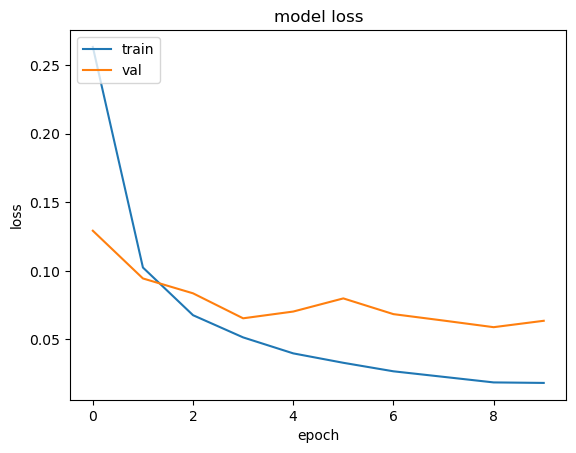

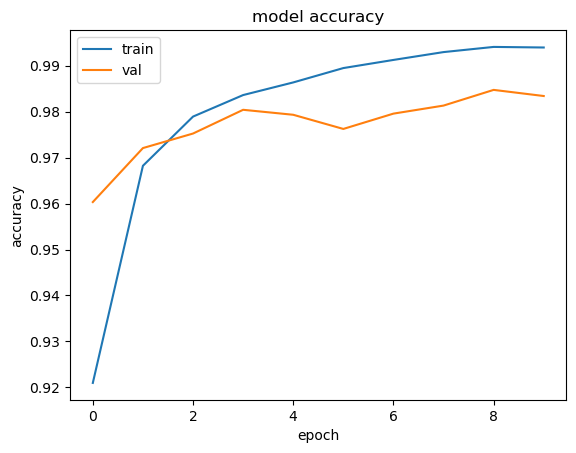

In [11]:
from matplotlib import pyplot as plt
# Show the learning curves
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [12]:
lenet_model = "lenet5.h5"
LeNet5_Model.save(lenet_model, save_format='h5')

In [13]:
loaded_model = load_model(lenet_model)